# Постановка задачи

Пусть дана некторая функция $f(x)$. Опять наша цель -- приблизить некоторым образом функцию на множестве.

Ранее рассматривался подход минимизации некоторой нормы

Сейчас же мы рассмотри другой подход: приближаем функцию так, чтобы в некоторых точках значение аппроксиманта совпадало со значением функции, или формально

Пусть даны узлы $x_0, \ldots, x_n \in \Omega$, необходимо найти такую функцию $\hat{f} \in F$, что
$$\hat{f}(x_i) = f(x_i), \quad \forall i = 0, 1, \ldots, n$$
где $F$ -- некоторык класс функций.

# Виды интерполяции

- алгебраическая -- приближаем с помощью многочлена некоторой степени
- тригонометрическая -- используем тригонометрический многочлен
- сплайн

Очевидно, что данная задача может быть сведена к решению СЛАУ.
$$P(x_i) = a_0 + a_1 x_i + c_2x_i^2 + \ldots = f(x_i),\quad \forall i$$

Если мы это запишем в матричном виде, что за матрица у нас получилась?

Получилась транспонированная матрица Вандермонда, но что не так?

Опять она -- обусловленность с ростом количества узлов.
$${\rm cond}_2W \geq \frac{2^{n - 1}}{\sqrt{n + 1}}$$

Хорошо, что существуют интерполяционные многочлены Ньютона и Лагранжа, которые не требуют решения системы.

При этом интерполяционный многочлен остается одним и тем же (он единственный!), изменяется лишь форма его представления.

# Лагранж

Многочлены степени $n$: $l_0(x), \ldots, l_n(x)$:
$$l_j(x_i) = \begin{cases}1,\quad i = j \\ 0,\quad i\neq j\end{cases}$$

Тогда интерполяционный многочлен можно записать в виде суммы этих элементарных многочленов:
$$L_n(x) = \sum\limits_{j = 0}^n f(x_j)l_j(x)$$
$$l_j(x) = \prod\limits_{k \neq j}^n\frac{x - x_k}{x_j - x_k}$$

Из этого видно, что от $x$ зависит только элементарный многочлен в формуле для интерполята.

-Пусть узлы и $x$ заключены в некоторый отрезок $[a, b]$, а функция  $f \in C^{n + 1}[a, b]$. Тогда
$$f(x) - L_n(x) = \frac{f^{(n + 1)}(\xi(x))}{(n + 1)!}\omega(x)$$
$$\omega(x) = \prod\limits_{k = 0}^{n}(x - x_k)$$

Первый сомножитель можно оценить с помощью максимума производной, а вот $|\omega(x)|$ зависит лишь от расположения узлов, но не от самой функции. 

На равномерной сетке данная функция сильно растет к краям отрезка:

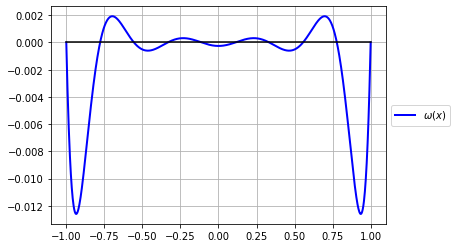

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.linspace(-1, 1, 1000)
x = np.linspace(-1, 1, 10)
omega = (X - x[0]);
for i in range(1, len(x)):
    omega *= (X - x[i])
plt.plot(X, omega, 'b', lw=2, label='$\omega(x)$')
plt.plot(X, 0*X, 'k')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1,.5)); plt.show()

Можно ли за счет выбора узлов уменьшить ошибку?

Да, можно.

Мы уже рассматривали ранее многочлен Чебышева и его свойства, тогда узлами сожно выбирать его корни.
$$x_k = \frac{a + b}{2} + \frac{b - a}{2}\cos\left(\frac{2k - 1}{2n}\pi\right)$$

Тогда $\omega(x)$ будет вести себя как многочлен Чебышева.

При таком выборе узлов интерполянт будет сходится равномерно к функции.

Более того, для равномерной сетки показано, что
$$\|P_n\| \geq O(2^nn^{-2})$$
А для Чебышевской
$$\|P_n\| \geq O(\log n)$$

тут $P_n$ -- линейный непрерывнфй оператор, отображающий функцию в пространство многочленов степени $n$.

Для достаточно гладкой функции справедлива оценка:
$$\|f - P_n f\|_{C[-1, 1]} = O(n^{-m}\log n)$$

На равномерной сетке можно даже не сойтись к нужной функции: $|x|,~x \in [-1, 1]$. 

Теорема гласит, что мы даже можем не сойтись к непрерывной функции.

Результаты обобщаются на многомерный случай.

# Ньютон

Можно записать интерполяционный многочлен несколько иначе, для этого нам понадобится понятие разделенной разности $f(x_0, x_1),~f(x_0, x_1, x_2), \ldots$.
$$f(x_0, x_1) = \frac{f(x_1) - f(x_0)}{x_1 - x_0}$$
$$f(x_0, \ldots, x_k) = \frac{f(x_1, \ldots, x_k) - f(x_0, \ldots, x_{k - 1})}{x_k - x_0}$$


$$f(x) - L_n(x) = f(x, x_0, \ldots, x_n)\omega(x)$$

\begin{align}
L_n(x) = f(x_0) 
&+ f(x_0, x_1)(x - x_0)\\
&+ f(x_0, x_1, x_2)(x - x_0)(x - x_1)\\
&\ldots\\
&+ f(x_0, x_1, \ldots, x_n)(x - x_0)\ldots(x - x_{n - 1})
\end{align}

Эта формула -- дискретный аналог Тейлора, но без производных.

Обычно при вычислениях строят таблицу из разделенных разностей.

<img src="./diffs.jpg">

In [19]:
def divided_differences(x, f):
    n = len(x);
    F = np.empty((n, n))
    F[:, 0] = f
    for k in range(1, n):
        F[0:n-k, k] = (F[1:n-k+1, k-1] - F[0:n-k, k-1]) / (x[k:] - x[:-k])
    return F # F[i, k] = f(x_i, x_{i+1}, ..., x_{i+k})

x = np.array([1, 2, 4, 5])
f = np.array([1, 3, 1, 3])
F = divided_differences(x, f)
print(F)

[[ 1.   2.  -1.   0.5]
 [ 3.  -1.   1.   0. ]
 [ 1.   2.   0.   0. ]
 [ 3.   0.   0.   0. ]]


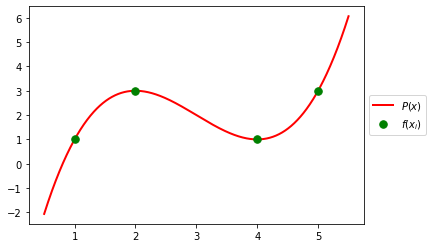

In [20]:
def evaluate(x, F, x0):
    n = len(x);
    P = 0;
    xprod = 1.0 # (x - x1) (x - x2) ... (x - xi)
    for i in range(n):
        P += F[0, i] * xprod
        xprod *= (x0 - x[i])
    return P

X = np.linspace(0.5, 5.5, 1000)
plt.plot(X, evaluate(x, F, X), 'r', lw=2, label='$P(x)$')
plt.plot(x, f, 'g.', ms=15, label='$f(x_i)$')
plt.legend(loc='center left', bbox_to_anchor=(1, .5)); plt.show()

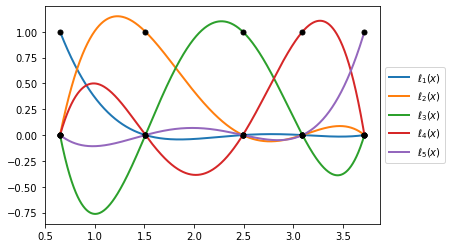

In [4]:
n = 5
x = np.cumsum(0.5 + np.random.rand(n))
X = np.linspace(x[0], x[-1], 1000)
for i in range(n):
    v = np.eye(n)[i]
    F = divided_differences(x, v)
    plt.plot(X, evaluate(x, F, X), label='$\ell_{%d}(x)$' % (i+1), lw=2)
    plt.plot(x, v, 'k.', ms=10)
plt.legend(loc='center left', bbox_to_anchor=(1, .5)); plt.show()

Рассмотрим сказанное выше на примере Рунге
$$f(x) = \frac{1}{1 + 25 x^2}, \quad x \in [-1, 1]$$

Равномерная сетка:

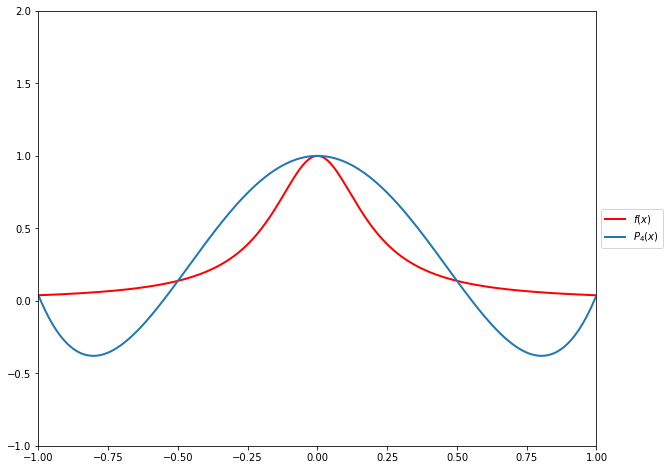

In [21]:
def runge(x):
    return 1 / (1 + 25 * x**2)

X = np.linspace(-1, 1, 1000)

plt.figure(figsize=(10, 8))
plt.plot(X, runge(X), 'r', label='$f(x)$', lw=2)
n = 5
x = np.linspace(-1, 1, n)
F = divided_differences(x, runge(x))
plt.plot(X, evaluate(x, F, X), label='$P_{%d}(x)$' % (n-1), lw=2)
plt.axis([-1, 1, -1, 2]); 
plt.legend(loc='center left', bbox_to_anchor=(1, .5)); plt.show()

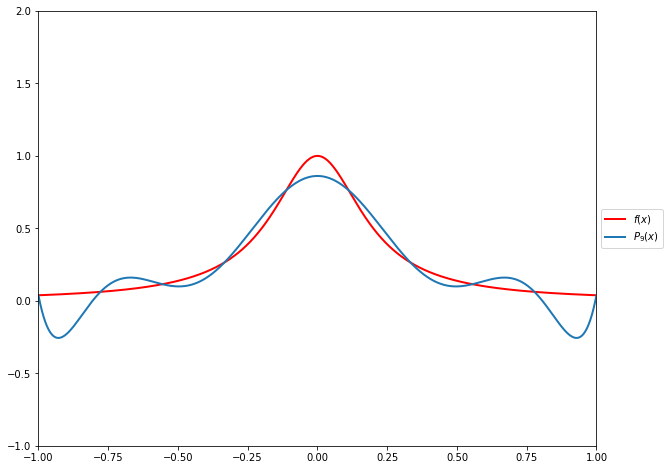

In [6]:
plt.figure(figsize=(10, 8))
plt.plot(X, runge(X), 'r', label='$f(x)$', lw=2)
n = 10
x = np.linspace(-1, 1, n)
F = divided_differences(x, runge(x))
plt.plot(X, evaluate(x, F, X), label='$P_{%d}(x)$' % (n-1), lw=2)
plt.axis([-1, 1, -1, 2]); 
plt.legend(loc='center left', bbox_to_anchor=(1, .5)); plt.show()


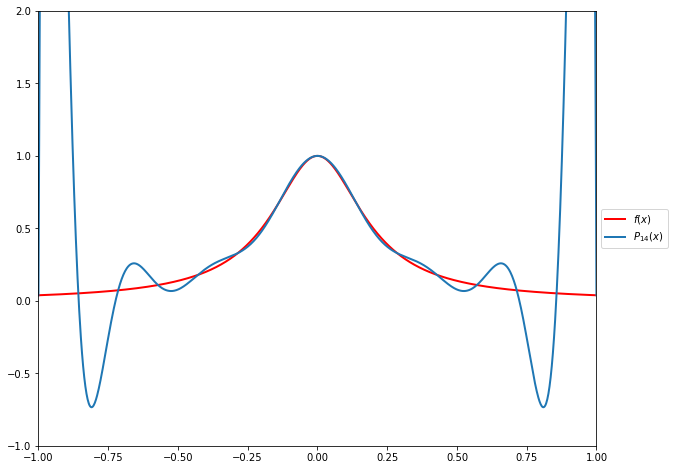

In [7]:
plt.figure(figsize=(10, 8))
plt.plot(X, runge(X), 'r', label='$f(x)$', lw=2)
n = 15
x = np.linspace(-1, 1, n)
F = divided_differences(x, runge(x))
plt.plot(X, evaluate(x, F, X), label='$P_{%d}(x)$' % (n-1), lw=2)
plt.axis([-1, 1, -1, 2]); 
plt.legend(loc='center left', bbox_to_anchor=(1, .5)); plt.show()

Чебышевская:

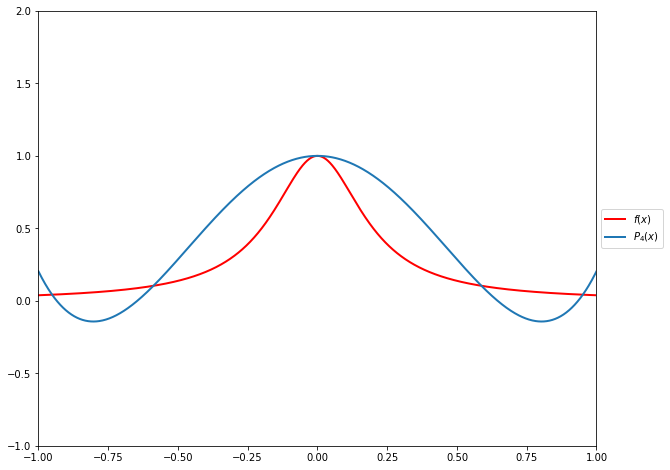

In [22]:
def runge(x):
    return 1 / (1 + 25 * x**2)

X = np.linspace(-1, 1, 1000)

plt.figure(figsize=(10, 8))
plt.plot(X, runge(X), 'r', label='$f(x)$', lw=2)
n = 5
x = np.cos((np.arange(n)*2+1) / (2*n) * np.pi)
F = divided_differences(x, runge(x))
plt.plot(X, evaluate(x, F, X), label='$P_{%d}(x)$' % (n-1), lw=2)
plt.axis([-1, 1, -1, 2]); 
plt.legend(loc='center left', bbox_to_anchor=(1, .5)); plt.show()

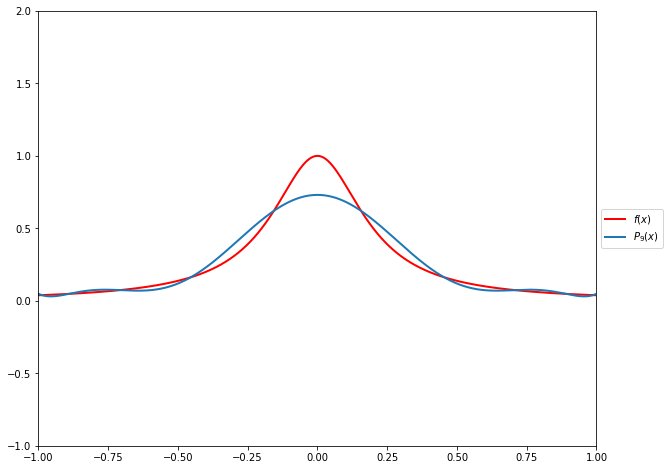

In [10]:
plt.figure(figsize=(10, 8))
plt.plot(X, runge(X), 'r', label='$f(x)$', lw=2)
n = 10
x = np.cos((np.arange(n)*2+1) / (2*n) * np.pi)
F = divided_differences(x, runge(x))
plt.plot(X, evaluate(x, F, X), label='$P_{%d}(x)$' % (n-1), lw=2)
plt.axis([-1, 1, -1, 2]); 
plt.legend(loc='center left', bbox_to_anchor=(1, .5)); plt.show()

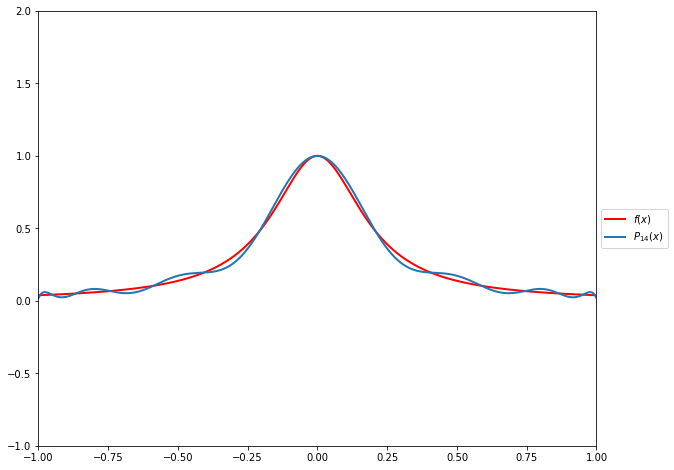

In [11]:
plt.figure(figsize=(10, 8))
plt.plot(X, runge(X), 'r', label='$f(x)$', lw=2)
n = 15
x = np.cos((np.arange(n)*2+1) / (2*n) * np.pi)
F = divided_differences(x, runge(x))
plt.plot(X, evaluate(x, F, X), label='$P_{%d}(x)$' % (n-1), lw=2)
plt.axis([-1, 1, -1, 2]); 
plt.legend(loc='center left', bbox_to_anchor=(1, .5)); plt.show()

# Чувствительность интерполяции

До сих пор мы считали, что значения функции $f(x)$ в узлах интерполяции заданы точно. На практике в значениях $f(x)$ присутствуют ошибки, свзяанные, например, с погрешностью измерения функции $f(x)$. В любом случае, при представлении в вычислительной технике $f(x_i)$ всегда содержит ошибку округления.

Для исследования чувствительности интерполяции удобно записывать интерполяционный многочлен в форме Лагранжа

$$L_n(x) = \sum_i f(x_i)l_i(x)$$

При возмущении значений в узлах на $\Delta f(x_i)$ интерполяционный многочлен изменяется
$$\hat{L}_n(x) = \sum_i [f(x_i) + \Delta f(x_i)]l_i(x)$$

$|L_n(x) - \hat{L}_n(x)|$ будем называть ошибкой чувствительности интерполяции. Предположим, что все $|\Delta f(x_i)|\leq \Delta f$. Тогда
$$|L_n(x) - \hat{L}_n(x)| \leq \Delta f\sum_i|l_i(x)|$$

Функция $\sum_i|l_i(x)|$ называется функцией Лебега и зависит только от расположения узлов.

$$\sum_i|l_i(x)| \geq |\sum_il_i(x)| = 1$$

то есть максимальная погрешность между узлами не меньше погрешности в самих узлах.

Величина $L = \max_{x \in [a, b]}\sum_i|l_i(x)|$ называется константой Лебега.


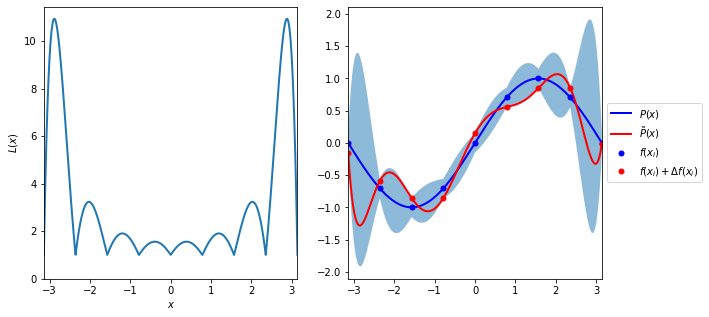

In [12]:
def ell(i, x, xs):
    A = np.array([(x-xs[k])/(xs[i]-xs[k]) for k in range(len(xs)) if i != k])
    return np.prod(A, axis=0)

def L(x, xs):
    return np.sum([np.abs(ell(i, x, xs)) for i in range(len(xs))], axis=0)

X = np.linspace(-np.pi, np.pi, 1000)
x = np.linspace(-np.pi, np.pi, 9)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1);
plt.plot(X, L(X, x), lw=2)
plt.xlabel('$x$')
plt.ylabel('$L(x)$')
plt.xlim(-np.pi, np.pi)
plt.ylim(0, None)

fv = np.sin(x)
delta = 0.15
fvs = fv + delta * np.tanh(10 * np.random.rand(len(fv)) - 5)

plt.subplot(1, 2, 2);
F = divided_differences(x, fv)
Fs = divided_differences(x, fvs)
plt.plot(X, evaluate(x, F, X), 'b', label='$P(x)$', lw=2)
up = evaluate(x, F, X) + delta * L(X, x)
down = evaluate(x, F, X) - delta * L(X, x)
plt.fill_between(X, down, up, alpha = 0.5)
plt.plot(X, evaluate(x, Fs, X), 'r', label='$\\tilde P(x)$', lw=2)
plt.plot(x, fv, 'b.', label='$f(x_i)$', ms=10)
plt.plot(x, fvs, 'r.', label='$f(x_i) + \\Delta f(x_i)$', ms=10)
plt.xlim(-np.pi, np.pi)
plt.legend(loc='center left', bbox_to_anchor=(1, .5))

plt.show()

Для равномерной сетки константа Лебега зависит только от числа узлов

- Для линейной интерполяции $(n=2)$ константа Лебега $L=1$.
- Для квадратичной интерполяции $(n=3)$ константа Лебега $L=1.25$.
- При $n=10$ константа Лебега $L\approx 19$.
- При $n=30$ константа Лебега $L\approx 4\cdot 106$.

Напротив, для сетки из нулей многочлена Чебышева (которая минимизирует ошибку интерполяции), константа Лебега оказывается довольно малой:

- Для линейной интерполяции $(n=2)$ константа Лебега $L=\sqrt{2}$.
- Для квадратичной интерполяции #(n=3)# константа Лебега $L\approx 1.6667$.
- При n=10 константа Лебега $L\approx 2.4288$.
- При n=30 константа Лебега $L\approx 3.1278$.

Для случайной сетки константа Лебега может быть сколь угодно большой.

# Сплайны

Чтобы избежать проблем от равномерной сетки, используют сплайны -- кусочно-многочленным интерполянтам.

На сетке как и ранее сплайн задается в виде $n$ функций $s_i(x)$
$$s(x) = s_i(x),\quad x \in [x_{i - 1}, x_i],~\forall i$$
И требование равенства значению функции в узлах:
$$s(x_i) = s_i(x_i) = f(x_i)$$


Сплайн характеризуется следующими параметрами:

- Степень — это степень многочленов $s_i(x)$
- Гладкость — это количество непрерывных производных у $s(x)$
- Дефект — это разность между степенью и гладкостью.

Легко показать, что условие «дефект = 0» приводит к тому, что все $s_i(x)$ совпадают, а сплайн превращается в интерполяционный многочлен.

Простейший сплайн имеет степень 1 и гладкость 0 — это приближение функции кусочно-линейной ломанной:

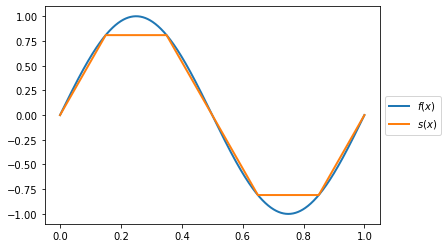

In [13]:
x = np.linspace(0, 1, 1000)
xs = np.array([0, 0.15, 0.35, 0.65, 0.85, 1])
plt.plot(x, np.sin(2*np.pi*x), lw=2, label='$f(x)$')
plt.plot(xs, np.sin(2*np.pi*xs), lw=2, label='$s(x)$')
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.show()


## Кубический сплайн дефекта 1

Каждая функция $s_i(x)$ определяется черырьмя параметрами
$$s_i(x) = a_i + b_i(x - x_i) + \frac{c_i}{2}(x - x_i)^2 + \frac{d_i}{6}(x - x_i)^3$$
$$a_i = s_i(x_i)$$
$$b_i = s'_i(x_i)$$
$$c_i = s''_i(x_i)$$
$$d_i = s'''_i(x_i)$$

На данный сплайн наложены условия (4n−2 штуки)

$$s_i(x_{i - 1}) = f(x_{i - 1})$$
$$s_i(x_{i}) = f(x_{i})$$
$$s'_i(x_{i}) = s'_{i + i}(x_{i})$$
$$s''_i(x_{i}) = s''_{i + 1}(x_{i})$$

У сплайна остаются два свободных параметра, их определяют из различных граничных условий, например

- $s_1'(x_0) = f'(x_0)$, $s_n'(x_n) = f'(x_n)$
- $s_1''(x_0) = f''(x_0)$, $s_n''(x_n) = f''(x_n)$
- Естественный сплайн $s_1''(x_0) = s_n''(x_n) = 0$

Одно из свойств естественного сплайна -- это то, что он минимизирует функционал энергии
$$E(f) = \int_{[a, b]}(f''(x))^2dx$$

Действительно, пусть $f$ дважды непрерывно дифференцируема
$$(f'')^2 - (s'')^2 = (f'' - s'')^2 + 2s''(f'' - s'')$$
$$E(f) - E(s) = E(f - s) + 2\int_{[a, b]}s''(f'' s'')dx$$
$$\int_{[a, b]}s''(f'' s'')dx = \sum_{k = 1}^n s''(f' - s')\mid_{x_{k - 1}}^{x_k} - s'''(f - s)\mid_{x_{k - 1}}^{x_k} = 0$$


## Построение сплайна

Существует несколько способов определения функций $s_i(x)$ для кубического сплайна, все они сводят задачу к решению трехдиагональной системы.

Рассмотрим вспомогательную задачу: определить $s_i(x)$ из условий
$$s_i(x_{i - 1}) = f_{i - 1}$$
$$s_i(x_{i}) = f_{i}$$
$$s'_i(x_{i - 1}) = m_{i - 1}$$
$$s'_i(x_{i}) = m_{i}$$

Эта задача называется задачей Эрмитовой интерполяции.

Решая задачу построения кубического сплайна Эрмита, получаем

$$s_i(x) = f_i + m_i(x - x_i) + \frac{2m_i + m_{i - 1} - 3f(x_{i-1, x_i})}{x_i - x_{i - 1}}(x - x_i)^2 + \frac{m_i + m_{i - 1} - 2f(x_{i - 1}, x_i)}{(x_i - x_{i - 1})^2}(x - x_i)^3$$

Составляя сплайн из Эрмитовых элементов мы сразу можем обеспечить непрерывность первой производной, задавая mi в каждом узле. Сами значения $m_i$ ($n+1$ штука) нужно определить из условия непрерывности второй производной и граничных условий.

Условие $s''_i(x_i) = s''_{i + 1}(x_i)$ определяет трехдиагональную систему.

Для естественного сплайна:
$$\frac{s''_1(x_0)}{2} = \frac{2m_1 + m_0 - 3f(x_0, x_1)}{h_{1/2}} = 0$$
$$\frac{s''_n(x_n)}{2} = \frac{2m_n + m_{n - 1} - 3f(x_{n - 1}, x_n)}{h_{n - 1/2}} = 0$$

дают граничные уравнения в системе.

Матрица такой системы будет симметричной и положительно определенной.


In [23]:
from scipy.linalg import solveh_banded

def cubic_spline(x, f):
    h = np.diff(x)
    n = len(h)
    df = np.diff(f) / h # Разделенные разности
    ab = np.zeros((2, n+1))
    b = np.zeros(n+1)
    ab[0, :n] = 2 / h; ab[0, 1:] += 2 / h
    ab[1, :n] = 1 / h
    b[:n] = 3 * df / h; b[1:] += 3 * df / h
    return solveh_banded(ab, b, lower=True)

def hermite(f1,m1,f2,m2,x1,x2,x):
    h = x2-x1; fd = (f2-f1)/h; dx = x-x2;
    return f2+m2*dx+(-3*fd+m1+2*m2)*dx**2/h + (m1+m2-2*fd)*dx**3/h**2

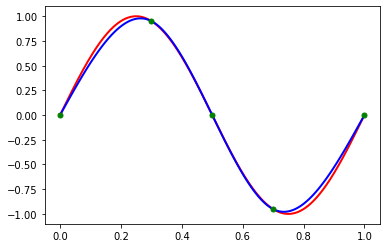

In [24]:
xs = np.array([0, .3, .5, .7, 1.]); ys = np.sin(2*np.pi*xs)
m = cubic_spline(xs, ys)
plt.plot(np.linspace(0, 1, 1000), np.sin(np.linspace(0, 2*np.pi, 1000)), 'r', lw=2)
for i in range(1, len(m)):
    x = np.linspace(xs[i-1], xs[i])
    plt.plot(x, hermite(ys[i-1], m[i-1], ys[i], m[i], xs[i-1], xs[i], x), 'b', lw=2)
plt.plot(xs, ys, 'g.', ms=10)
plt.show()